In [3]:
df=pd.read_csv('/Users/nicole/Desktop/aug_train.csv')

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import numpy as np
import os
from natsort import natsorted as ns

enrollee_id : Unique ID for candidate

city: City code

city_ development _index : Developement index of the city (scaled)

gender: Gender of candidate

relevent_experience: Relevant experience of candidate

enrolled_university: Type of University course enrolled if any

education_level: Education level of candidate

major_discipline :Education major discipline of candidate

experience: Candidate total experience in years

company_size: No of employees in current employer's company

company_type : Type of current employer

lastnewjob: Difference in years between previous job and current job

training_hours: training hours completed

target: 0 – Not looking for job change, 1 – Looking for a job change

In [4]:
df.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
5,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1.0
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5,50-99,Funded Startup,1,24,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
9,699,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [6]:
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000



Qualitative:   
    categorical:    
    - nominal: city, gender, enrolled_university, education_level (order??), major_discipline, company_type    
    - ordinal: relevent_experience
    Text: enrollee_id 
    
Quantative:   
    continuous:   
    - city_development_index (between 0-1)    
    - training_hours (between 1 - 336)  
    discrete:   
    - company_size (category?)
    
Numerical categorical:
    - experience (continuous?),last_new_job (continuous?)
    
Target variable is target (0 – Not looking for job change, 1 – Looking for a job change)

# Remove noise and check null

In [7]:
df = df.drop(columns = 'enrollee_id')

In [8]:
df.head(10)

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
5,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1.0
6,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5,50-99,Funded Startup,1,24,0.0
7,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
9,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0.0


In [9]:
df.isnull().sum()

city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


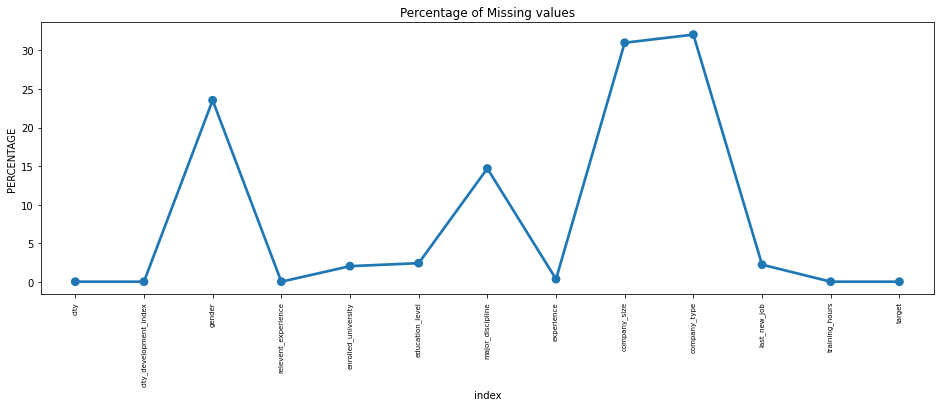

In [10]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

There are missing values in 7 variables.   
- ~30% missing value in 'company_size' and 'company_type'   
- ~25% in 'gender', ~15% in 'major_discipline' and    
- less than 5% in 'enrolled_university', 'education_level', 'last_new_job' and 'experience'.

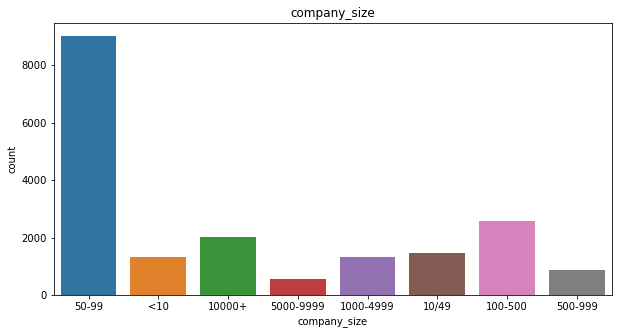

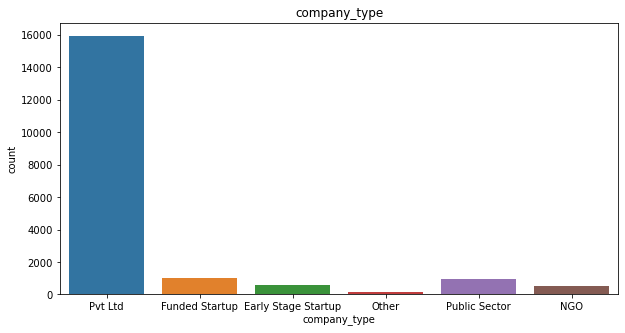

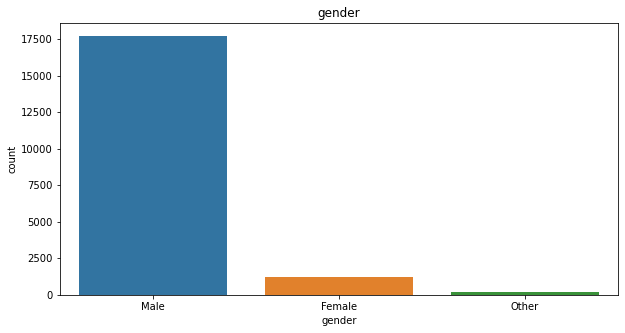

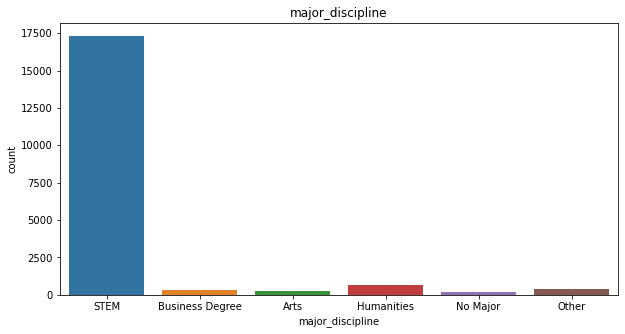

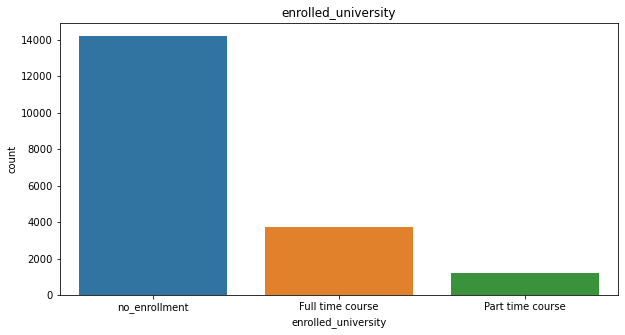

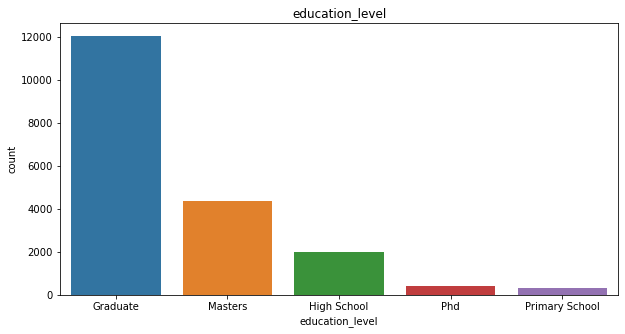

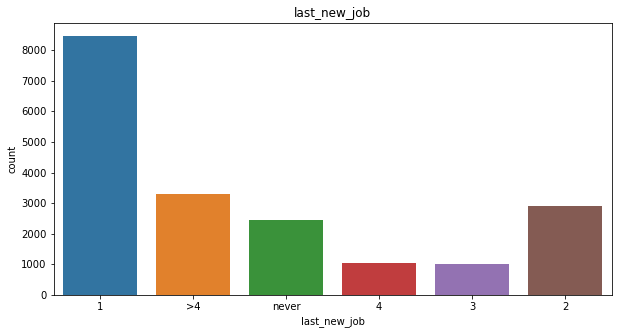

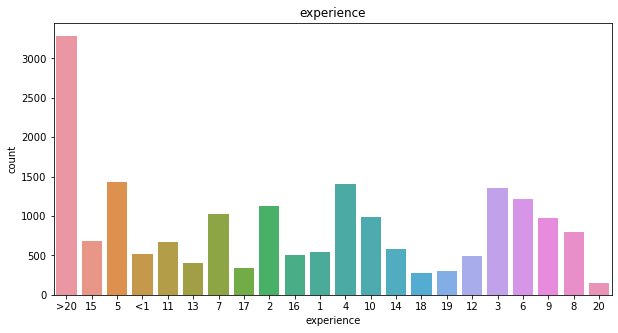

In [85]:
# check distribution of data
for i in ['company_size','company_type','gender','major_discipline','enrolled_university',
          'education_level','last_new_job','experience']:
    plt.figure(figsize= (10,5))
    sns.countplot(data= df, x = i)
    plt.title(i)
    plt.show()

In [11]:
# fill na with mode for all
for i in ['company_size','company_type','gender','major_discipline','enrolled_university',
          'education_level','last_new_job','experience']:
    df[i] = df[i].fillna(df[i].mode()[0])

In [12]:
# #double check  #no null value
df.isnull().sum()

city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

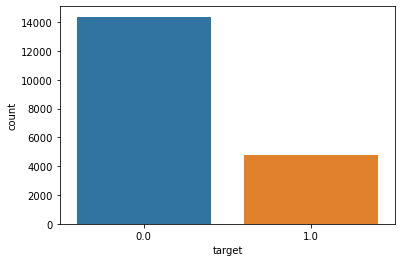

In [43]:
sns.countplot(data=df, x='target')

In [91]:
df.target.value_counts(normalize=True)*100

0.0    75.065247
1.0    24.934753
Name: target, dtype: float64

Target value is imbalance. The ratio of (0:1) is 3:1, around 25% people in the sample are looking for job change.

# Univariate
## Against target

<AxesSubplot:>

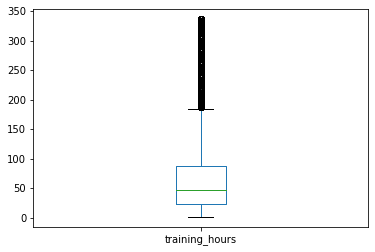

In [37]:
df.training_hours.plot.box()

<AxesSubplot:>

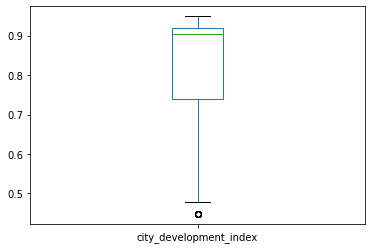

In [38]:
df.city_development_index.plot.box()

<Figure size 432x288 with 0 Axes>

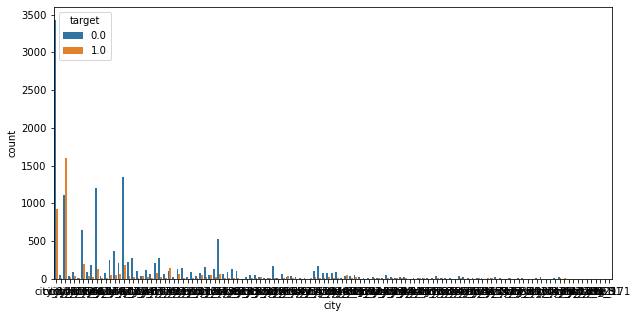

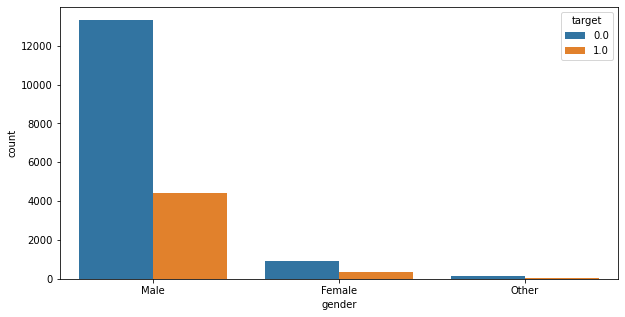

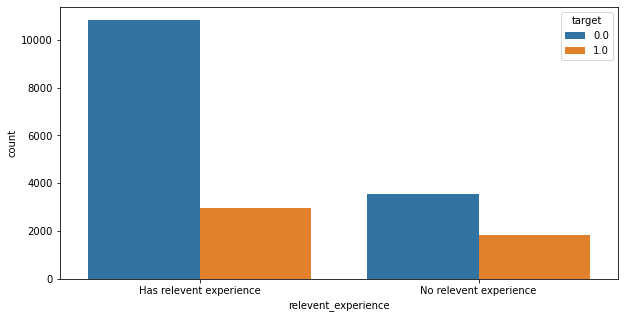

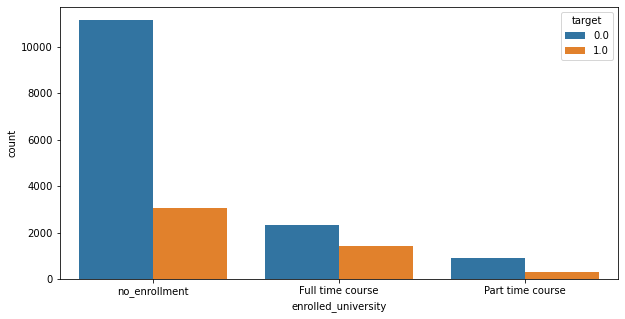

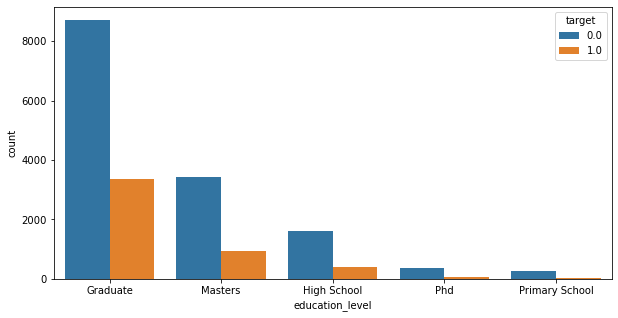

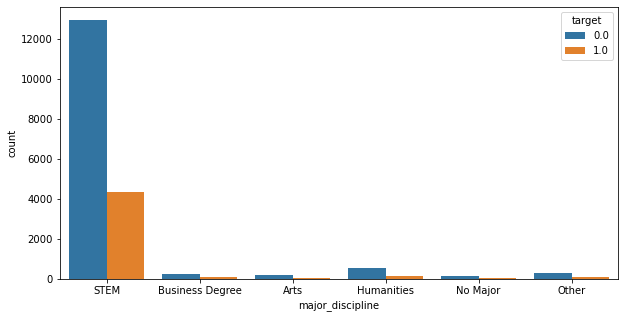

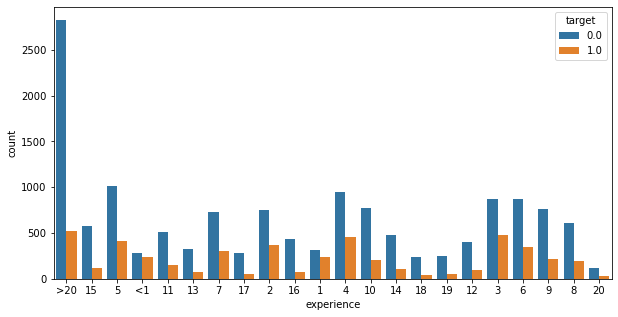

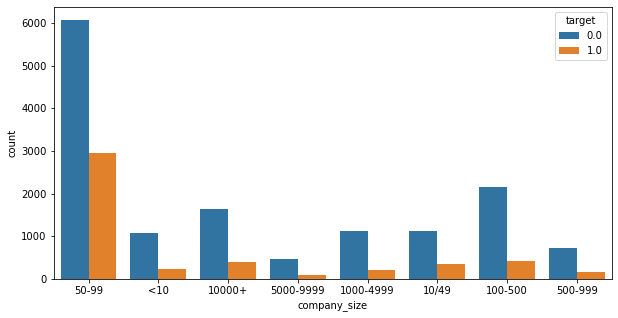

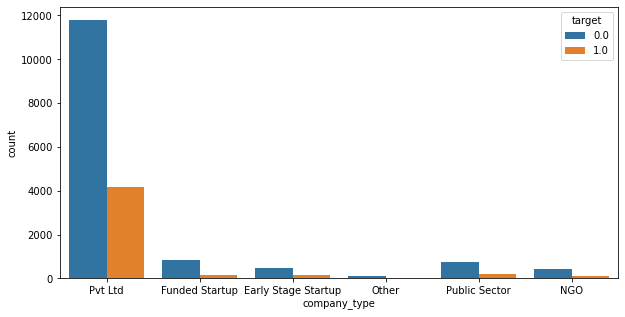

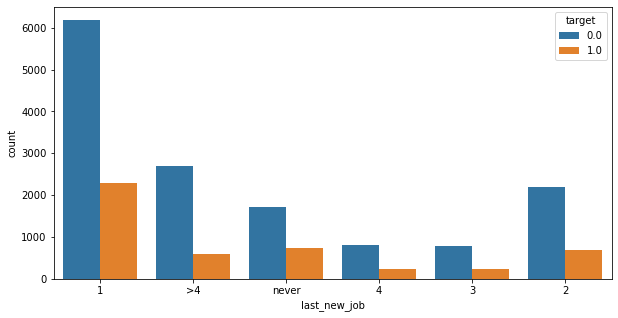

In [36]:
for i,predictor in enumerate(df.drop(columns= ['city_development_index','training_hours','target'])):
    plt.figure(i)
    plt.figure(figsize=(10,5))
    sns.countplot(data= df, x =predictor ,hue = 'target')

In [187]:
df.groupby('relevent_experience').target.value_counts(normalize=True)

relevent_experience      target
Has relevent experience  0.0       0.785310
                         1.0       0.214690
No relevent experience   0.0       0.661573
                         1.0       0.338427
Name: target, dtype: float64

In [186]:
df.groupby('enrolled_university').target.value_counts(normalize=True)

enrolled_university  target
Full time course     0.0       0.619111
                     1.0       0.380889
Part time course     0.0       0.747913
                     1.0       0.252087
no_enrollment        0.0       0.785679
                     1.0       0.214321
Name: target, dtype: float64

In [188]:
df.groupby('education_level').target.value_counts(normalize=True)

education_level  target
Graduate         0.0       0.722259
                 1.0       0.277741
High School      0.0       0.804660
                 1.0       0.195340
Masters          0.0       0.785600
                 1.0       0.214400
Phd              0.0       0.859903
                 1.0       0.140097
Primary School   0.0       0.866883
                 1.0       0.133117
Name: target, dtype: float64

<AxesSubplot:xlabel='experience', ylabel='count'>

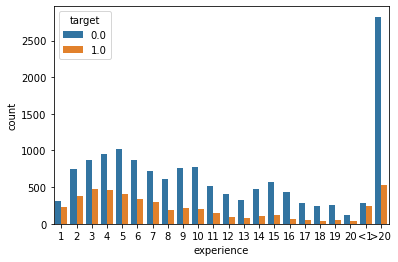

In [196]:
sns.countplot(data=df,x ='experience',hue = 'target',order = natsorted(df.experience.unique()))

In [13]:
b = df.experience.unique()
ns(b)
c=['<1','1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '>20']

In [23]:
df.groupby('experience').target.value_counts(normalize=True)[c][:,1]

experience
<1     0.454023
1      0.424408
2      0.331854
3      0.353028
4      0.325731
5      0.288112
6      0.282072
7      0.294747
8      0.243142
9      0.217347
10     0.210152
11     0.227410
12     0.186235
13     0.192982
14     0.182594
15     0.166181
16     0.141732
17     0.166667
18     0.153571
19     0.174342
20     0.222973
>20    0.156968
Name: target, dtype: float64

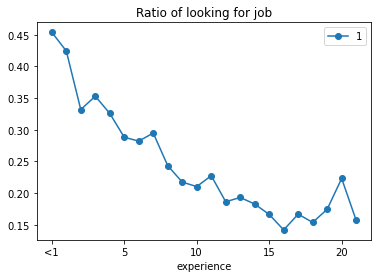

In [31]:
df.groupby('experience').target.value_counts(normalize=True).loc[c][:,1].plot(title = 'Ratio of looking for job',style='-o')
plt.legend(['1'])
plt.show()

<AxesSubplot:xlabel='company_size', ylabel='count'>

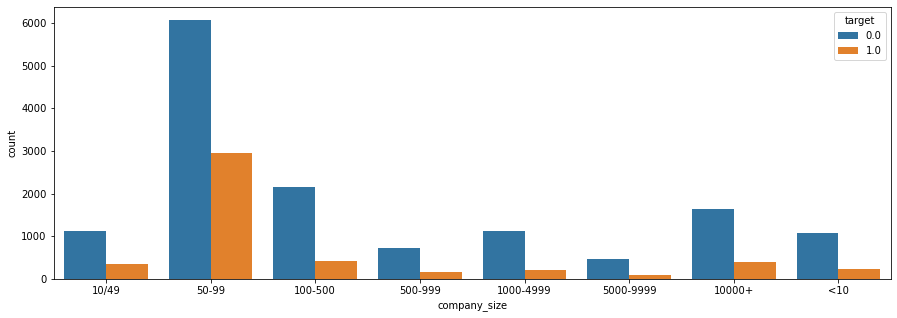

In [199]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x ='company_size',hue = 'target',order = natsorted(df.company_size.unique()))

In [403]:
df.groupby('company_size').target.value_counts(normalize=True)

company_size  target
10/49         0.0       0.766145
              1.0       0.233855
100-500       0.0       0.838584
              1.0       0.161416
1000-4999     0.0       0.849398
              1.0       0.150602
10000+        0.0       0.809312
              1.0       0.190688
50-99         0.0       0.672431
              1.0       0.327569
500-999       0.0       0.826682
              1.0       0.173318
5000-9999     0.0       0.818828
              1.0       0.181172
<10           0.0       0.828746
              1.0       0.171254
Name: target, dtype: float64

In [207]:
df.groupby('company_type').target.value_counts(normalize=True)

company_type         target
Early Stage Startup  0.0       0.764511
                     1.0       0.235489
Funded Startup       0.0       0.860140
                     1.0       0.139860
NGO                  0.0       0.813820
                     1.0       0.186180
Other                0.0       0.760331
                     1.0       0.239669
Public Sector        0.0       0.780105
                     1.0       0.219895
Pvt Ltd              0.0       0.739362
                     1.0       0.260638
Name: target, dtype: float64

In [25]:
y = df.last_new_job.unique()
y = [ 'never','1', '2', '3','4','>4',]

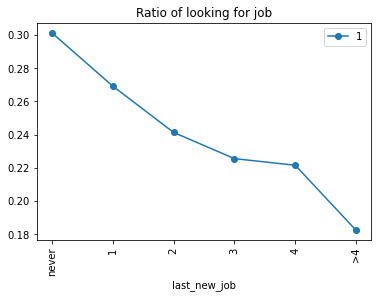

In [30]:
df.groupby('last_new_job').target.value_counts(normalize=True)[y][:,1].plot.line(title = 'Ratio of looking for job',rot=90,style='o-')
plt.legend(['1'])
plt.show()

Gender - No significant difference.     
Experience - People with no relevent experience has a higher ratio of looking for job. (33%)    
University - People enrolled in full time course has a higher rato of looking for job. (38%)   
Edcucation - People in Phd, Primary school has a lower ratio of looking for job.(~14%)   
Major - No significant difference.   
Year of experience - People with less experience tend to have a higher ratio of looking for job.   
Company size - company size in 50-99 has a higher ratio of looking for job.   
Company type - People work in Funded Startup and NGO has a higher ratio of looking for job.   
Last new job - People who never change their job has a higher ration of looking for job, and the ratio people working in the same company with more than 4 has a lower ratio of looking for jobs.   

<Figure size 432x288 with 0 Axes>

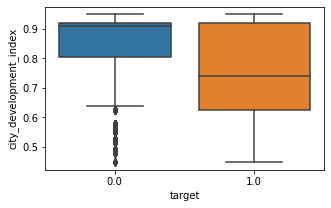

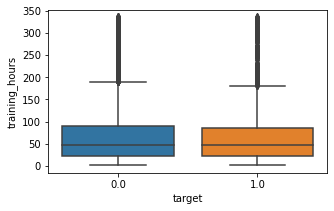

In [178]:
for i,predictor in enumerate(df[['city_development_index','training_hours']]):
    plt.figure(i)
    plt.figure(figsize=(5,3))
    sns.boxplot(data= df, y =predictor ,x= 'target')

In [180]:
df.groupby('target').describe()

city_development_index                                                \
                        count      mean       std    min    25%   50%   75%   
target                                                                        
0.0                   14381.0  0.853139  0.105354  0.448  0.804  0.91  0.92   
1.0                    4777.0  0.755719  0.143166  0.448  0.624  0.74  0.92   

              training_hours                                               \
          max          count       mean        std  min   25%   50%   75%   
target                                                                      
0.0     0.949        14381.0  66.113761  60.938937  1.0  23.0  48.0  90.0   
1.0     0.949         4777.0  63.118484  57.273662  1.0  23.0  46.0  86.0   

               
          max  
target         
0.0     336.0  
1.0     336.0

City index - For people who are not looking for job change, their average city index is higher. 50% of those is higher than 0.9.   
Training hour - No significant difference.

In [138]:
len(df.city.unique())

123

Could not find pattern between city name number and city index.

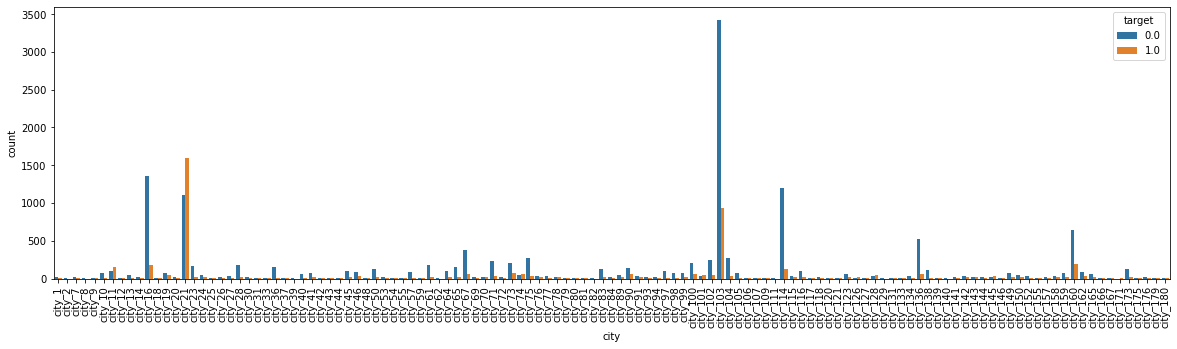

In [310]:
plt.figure(figsize = (20,5))
ax = sns.countplot(data= df,x='city',hue='target')
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

In [378]:
a= df.groupby('city').target.value_counts(normalize=True)[:,1]
a

city
city_1      0.115385
city_7      0.185185
city_9      0.277778
city_10     0.104651
city_11     0.595142
              ...   
city_173    0.125828
city_175    0.214286
city_176    0.291667
city_179    0.600000
city_180    0.285714
Name: target, Length: 115, dtype: float64

In [382]:
a[a>0.7]

city
city_139    0.800000
city_155    0.785714
city_171    1.000000
Name: target, dtype: float64

In [53]:

ns(df.city)
# df['city'] = pd.Categorical(df['city'],ordered=True, categories = natsorted(df['city'].unique()))
# df.sort_values('city')

['city_1',
 'city_1',
 'city_1',
 'city_1',
 'city_1',
 'city_1',
 'city_1',
 'city_1',
 'city_1',
 'city_1',
 'city_1',
 'city_1',
 'city_1',
 'city_1',
 'city_1',
 'city_1',
 'city_1',
 'city_1',
 'city_1',
 'city_1',
 'city_1',
 'city_1',
 'city_1',
 'city_1',
 'city_1',
 'city_1',
 'city_2',
 'city_2',
 'city_2',
 'city_2',
 'city_2',
 'city_2',
 'city_2',
 'city_7',
 'city_7',
 'city_7',
 'city_7',
 'city_7',
 'city_7',
 'city_7',
 'city_7',
 'city_7',
 'city_7',
 'city_7',
 'city_7',
 'city_7',
 'city_7',
 'city_7',
 'city_7',
 'city_7',
 'city_7',
 'city_7',
 'city_7',
 'city_7',
 'city_7',
 'city_7',
 'city_7',
 'city_7',
 'city_7',
 'city_7',
 'city_8',
 'city_8',
 'city_8',
 'city_8',
 'city_9',
 'city_9',
 'city_9',
 'city_9',
 'city_9',
 'city_9',
 'city_9',
 'city_9',
 'city_9',
 'city_9',
 'city_9',
 'city_9',
 'city_9',
 'city_9',
 'city_9',
 'city_9',
 'city_9',
 'city_9',
 'city_10',
 'city_10',
 'city_10',
 'city_10',
 'city_10',
 'city_10',
 'city_10',
 'city_10',
 '

# Bivariate

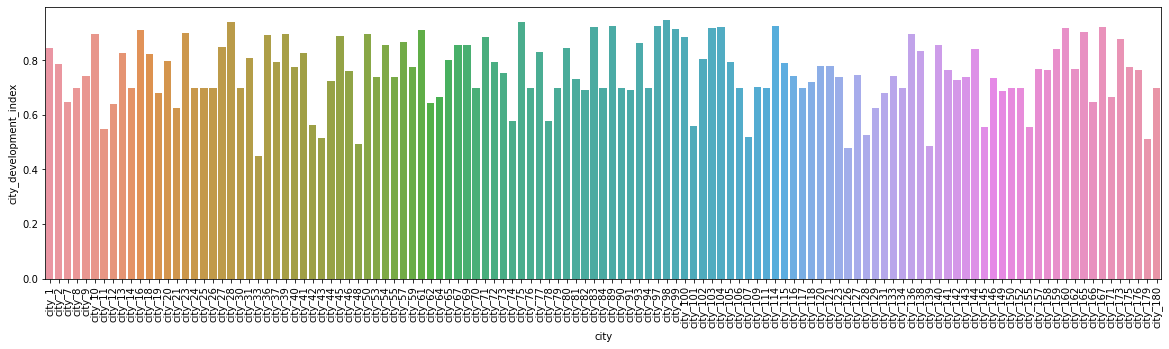

In [303]:
plt.figure(figsize = (20,5))
ax = sns.barplot(data= df,x='city',y='city_development_index')
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

In [388]:
#check the city index of city 139,155,171  #0.448 is the min index
df[df.city.isin(['city_139','city_155','city_171'])].city_development_index.unique()

array([0.556, 0.487, 0.664])

In city_139,city_155,city_171 has the highest ratio of looking for job.

<AxesSubplot:>

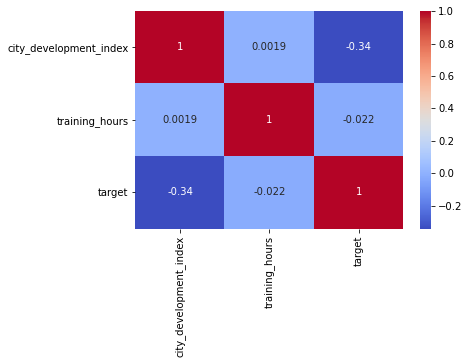

In [39]:
sns.heatmap(df.corr(),cmap='coolwarm',annot = True)

# Data transformation

## Check correlation bewteen variables

In [47]:
dfl = df.copy()

In [48]:
def experience1(experience):
    if experience in ['<1','1']:
        return 0
    elif experience in ['2','3']:
        return 1
    elif experience in ['4','5']:
        return 2
    elif experience in ['6','7']:
        return 3
    elif experience in ['8','9']:
        return 4
    elif experience in ['10','11']:
        return 5
    elif experience in ['12','13']:
        return 6
    elif experience in ['14','15']:
        return 7
    elif experience in ['16','17']:
        return 8
    elif experience in ['18','19']:
        return 9
    elif experience in ['20','>20']:
        return 10
    else:
        return np.nan

In [49]:
dfl['experience'] = dfl['experience'].apply(experience1)

In [50]:
dfl['hours_group'] = pd.cut(dfl['training_hours'], 5,labels=range(0,5))

In [51]:
# check correlation between features , remove city as it has high cardinality
dfd=pd.get_dummies(dfl.drop(columns = 'city'))

In [52]:
dfd.head()

,city_development_index,experience,training_hours,target,gender_Female,gender_Male,gender_Other,relevent_experience_Has relevent experience,relevent_experience_No relevent experience,enrolled_university_Full time course,...,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never,hours_group_0,hours_group_1,hours_group_2,hours_group_3,hours_group_4
0,0.920,10,36,1.0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.776,7,47,0.0,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
2,0.624,2,83,0.0,0,1,0,0,1,1,...,0,0,0,0,1,0,1,0,0,0
3,0.789,0,52,1.0,0,1,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
4,0.767,10,8,0.0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


<AxesSubplot:>

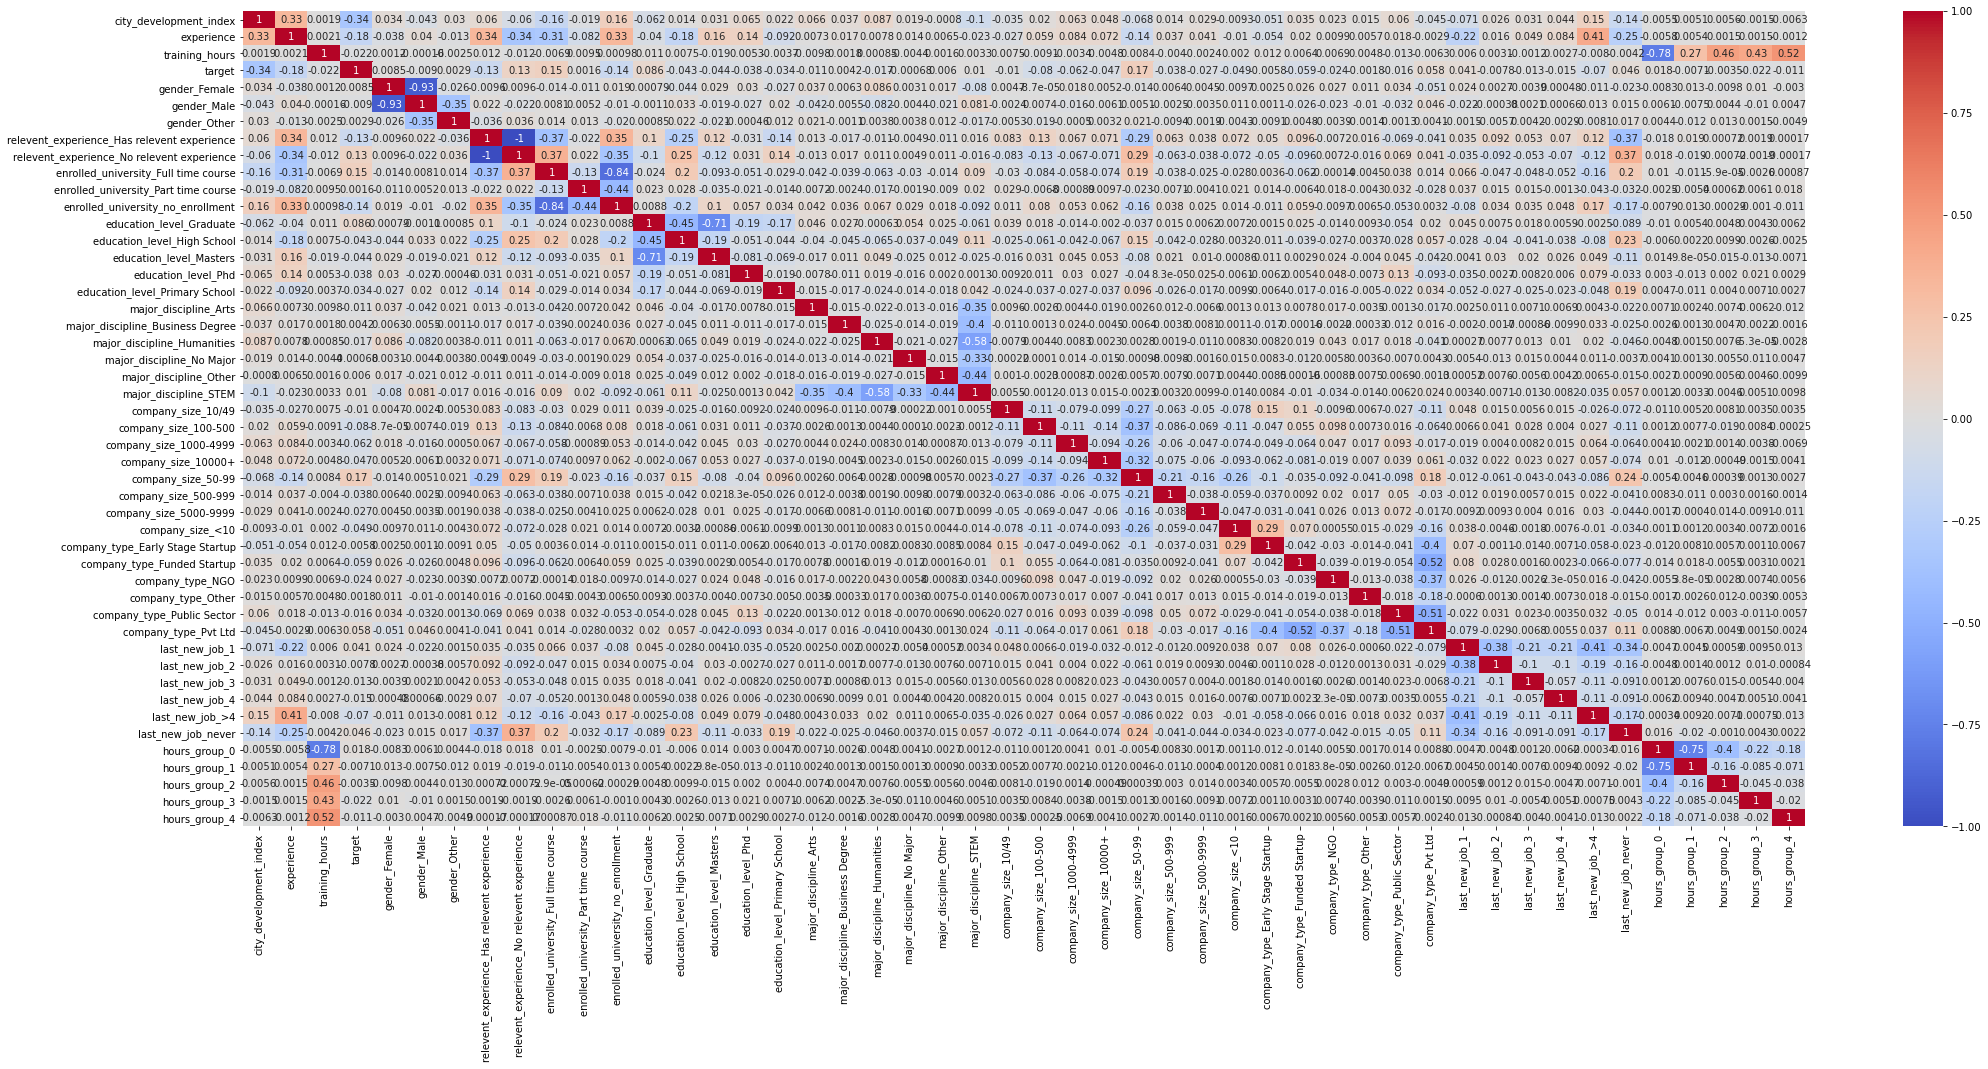

In [56]:
plt.figure(figsize=(35,15))
sns.heatmap(dfd.corr(),annot=True,cmap='coolwarm')

<AxesSubplot:>

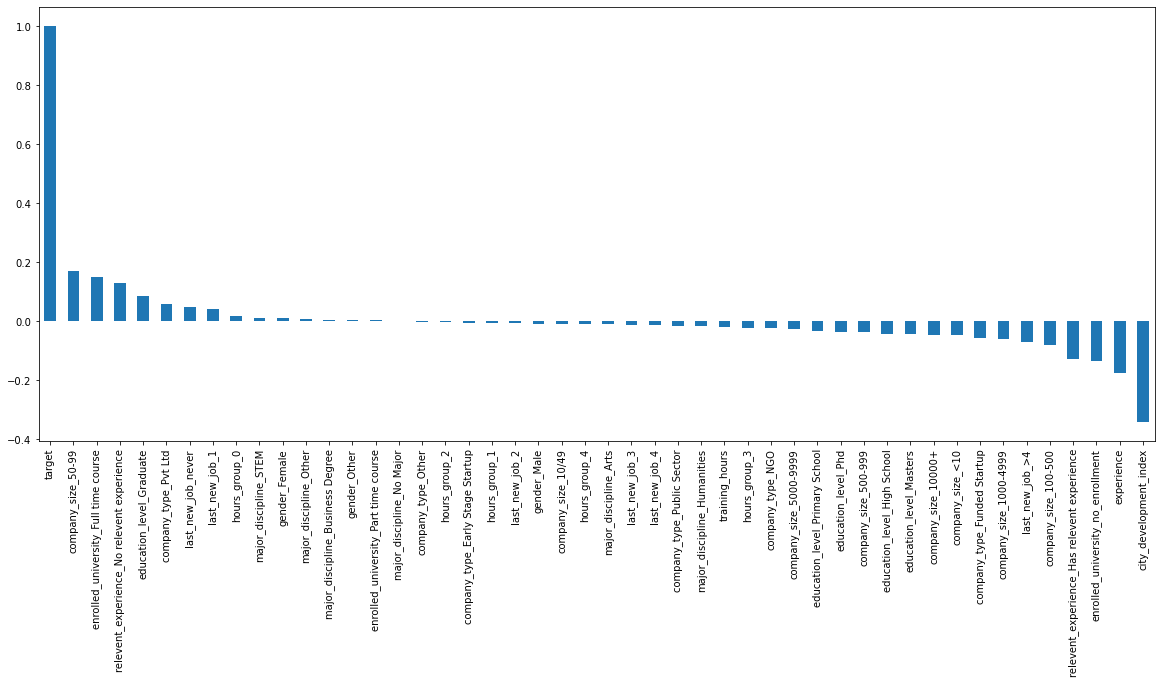

In [54]:
plt.figure(figsize=(20,8))
dfd.corr()['target'].sort_values(ascending = False).plot(kind='bar')

# Conclusion


Target value is imbalance.     
City index has a higher correlation with target. People from lower index city tend to look for a job change.   

After checking the correlation:   
Experience - People with no relevent experience has a higher ratio of looking for job. Maybe it is because those people attending training class to look for a change in working field.

Year of experience - People with less experience tend to have a higher ratio of looking for job. Maybe due the cost of changing job. Salary tends to be higher with higher year of experience, it might be harder for them to find a job with same or higher salary.

Company size - company size in 50-99 has a higher ratio of looking for job. Maybe due to the less changlleging environment than a small company, and compensation usually less than a big company.